<a href="https://colab.research.google.com/github/TanuRajput110/Playstore-App-Reviews-Analysis/blob/main/_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**1.Data Preprocessing**

In [ ]:
#imporing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##1(a)>>Loading Dataset

In [ ]:
#loading dataset
df1=pd.read_csv('/content/gdrive/MyDrive/AlmaBetter/Alma Projects/Play Store App Reviews Analysis/Play Store Data.csv')

In [ ]:
df=df1.copy()

##1(b)>>Information of Dataset

In [ ]:
#overview of dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#dataset information
def information(df):
    print(f"Dataset Shape: {df.shape}")
    information = pd.DataFrame(df.dtypes,columns=['dtypes']).reset_index()
    information['Name'] = information['index']
    information= information[['Name','dtypes']]
    information['Null'] = df.isnull().sum().values    
    information['Uniques'] = df.nunique().values
    return information
result = information(df).sort_values('Null', ascending= False)
print(result)

Dataset Shape: (10841, 13)
              Name   dtypes  Null  Uniques
2           Rating  float64  1474       40
11     Current Ver   object     8     2832
12     Android Ver   object     3       33
6             Type   object     1        3
8   Content Rating   object     1        6
0              App   object     0     9660
1         Category   object     0       34
3          Reviews   object     0     6002
4             Size   object     0      462
5         Installs   object     0       22
7            Price   object     0       93
9           Genres   object     0      120
10    Last Updated   object     0     1378


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##1(c)>>Understanding of the variables

In [ ]:
#size of dataset
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.duplicated().sum()

483

In [ ]:
#check for null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

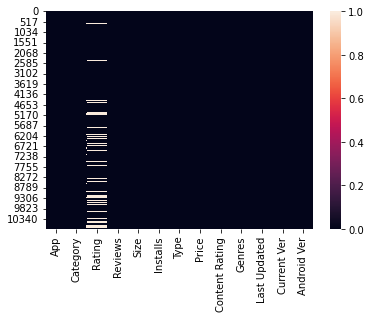

In [ ]:
sns.heatmap(df.isnull())

##----->**Observaion:**

1.Our Dataset has 10841 rows and  13 columns.

2.It has 483 Duplicates.

3.It has missing values with variation in occurrence and a few (neglegible) null values in the following columns ---
                
                 Type,Content Rating,Current Ver and Android Ver.


In [ ]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

##1(d)>>Unique Values

In [ ]:
col=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']

In [ ]:
for i in col:
  print(f"unique values of column ------{i}")
  print(df[i].unique())
  print("\n")


unique values of column ------App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


unique values of column ------Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


unique values of column ------Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4

#2.Data Wrangling

##2(a)>>Drop Duplicate

In [ ]:
#check number of duplicate
print(f"Total duplicate values before removing ---{df.duplicated().sum()}")

Total duplicate values before removing ---483


In [ ]:
#drop duplicate
print(df.drop_duplicates(inplace=True))


None


In [ ]:
#again check duplicate....
print(f"Total duplicate values after removing ---{df.duplicated().sum()}")

Total duplicate values after removing ---0


##2(b)>>DROP unnecessary column

In [ ]:
df.drop(['Last Updated'], axis = 1,inplace = True)

In [ ]:
#now lt's check all the column again
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')

##2(c)>>Replace null values and dataType conversion

In [ ]:
#check null
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# replacing all null values in type,Current Ver and content rating column with 0
#In rating column we will replace nan values by its mean later in outlier handling
df.fillna({'Type':0,}, inplace=True)
df.fillna({'Content Rating':0,}, inplace=True)
df.fillna({'Current Ver':0,}, inplace=True)

In [ ]:
#check null values again 
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Current Ver          0
Android Ver          3
dtype: int64

Now ,we handles all the null values,but In 'Android Ver' column we have 3,which we will handle later.

In [ ]:
# lets observe normally the outliers or extreme values in statistical description
df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000





In above  description,we can clearly see that we have some numerical columns other than Rating but with not numerical datatypes..so convert those into numeric

In [ ]:
#pd.to_numeric(df.Reviews)-------------------it is giving some error(Unable to parse string "3.0M" at position 9990)-
# let's handle it by giving errors='coerce' in pd.to_numeric...to set invalid parsing as NaN....

             we have a row here,in which we have '3.0M' Reviews ,'February 11, 2018' Genres,'Free' Installs....
             so we have to handle that row---which is row no.-- 10472

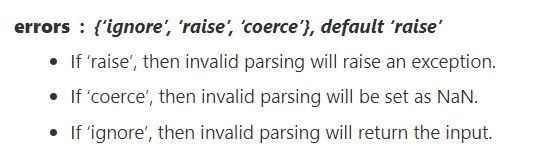

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#convert required columns into Numeric
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce')
df.Price = pd.to_numeric(df.Price, errors='coerce')
df.Rating = pd.to_numeric(df.Rating, errors='coerce')



In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
# Finding the row with insufficiant data(we have an irrelevent record--('Free') ---in Installs column)
df[df['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,NaN,0,"February 11, 2018",4.0 and up,NaN


In [ ]:
#Finding the row with insufficiant data(we have an irrelevent record----(February 11, 2018)--- in Genres column)
df[df['Genres']=='February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,NaN,0,"February 11, 2018",4.0 and up,NaN


In same row (row no. 10472)..we have  'Free' record in Installs column 

we have 'February 11, 2018' record in Genres column....

if we drop one of them ,we can handle both irrelevencies.

In [ ]:
#Droping the found carbage row from our dataframe
df.drop(df[df['Genres']=='February 11, 2018'].index, inplace=True)

In [ ]:
#df.loc[[10472]]-----------successfully removed

In [ ]:
#Removing 10472 due to data mismatch in the column
#df.drop(df[df['Installs']=='Free'].index, inplace=True)

#3.Columns Formatting

###3(a)>>Installs Column 

In [ ]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))

In [ ]:
df['Installs']=pd.to_numeric(df['Installs'].str.replace(',',''))


##3(b)>>Price Column

In [ ]:
df['Price'] = df['Price'].replace('$','')

In [ ]:
df.fillna({'Price':0,}, inplace=True)

In [ ]:
df['Price'].isnull().sum()

0

##3(c)>>Size column

In [ ]:
#Clean string function
def clean_it(num):
  if 'M' in num:
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in num:
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [ ]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = pd.to_numeric(df['Size'].map(lambda x: clean_it(x)))

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up


##3(c)>>'Android Ver' column

In [ ]:
df['Android Ver'].head()

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
Name: Android Ver, dtype: object

In [ ]:
df['Android Ver'].dtypes

dtype('O')

In [ ]:
df['Android Ver']=df['Android Ver'].astype(str)
df['Android Ver']=df['Android Ver'].apply(lambda x: x.split()[0])

In [ ]:
#df['Android Ver']= df['Android Ver'].replace(to_replace="Varies", value="0.0.0")
#f['Android Ver'] = df['Android Ver'].replace(to_replace="4.4W", value="4.4")

In [ ]:
df['Android Ver'].value_counts()

4.1       2380
4.0.3     1453
4.0       1337
Varies    1221
4.4        894
2.3        643
5.0        550
4.2        387
2.3.3      279
2.2        240
3.0        237
4.3        235
2.1        133
1.6        116
6.0         58
7.0         43
3.2         36
2.0         32
5.1         22
1.5         20
4.4W        11
3.1         10
2.0.1        7
8.0          6
7.1          3
nan          2
1.0          2
Name: Android Ver, dtype: int64

In [ ]:
#df.fillna({'Android Ver':0,}, inplace=True)

##3(d)>>'Type' column

In [ ]:
df['Type'].unique()

array(['Free', 'Paid', 0], dtype=object)

In [ ]:
df['Type']=df['Type'].replace(0,"Free")

#4.Outliers

We have 1465 null values in Ratings columns.So we have to handle them.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


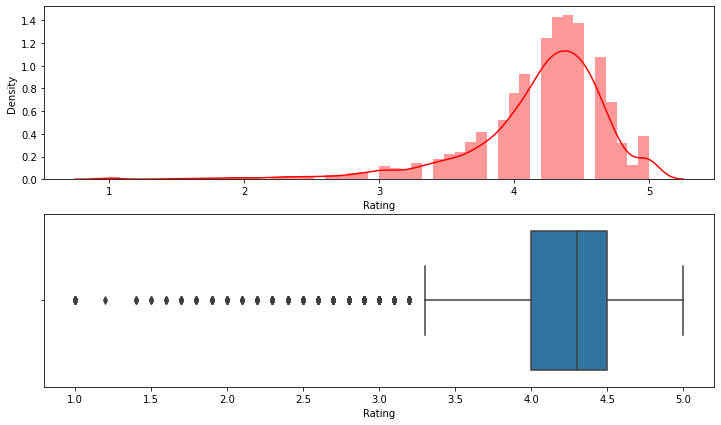

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df['Rating'],color='red',ax=ax[0])
sns.boxplot(x='Rating',data=df, ax=ax[1])

The mean of the average ratings (excluding the NaN values) comes to be 4.2.

The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.

From the distplot visualizations, it is clear that the ratings are left skewed.

We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

Hence we will impute the NaN values in the Rating column with its median.

In [ ]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61.0,7000000,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,1.0.0,4.1
113,Wrinkles and rejuvenation,BEAUTY,NaN,182.0,5700000,100000,Free,0.0,Everyone 10+,Beauty,8.0,3.0
123,Manicure - nail design,BEAUTY,NaN,119.0,3700000,50000,Free,0.0,Everyone,Beauty,1.3,4.1
126,Skin Care and Natural Beauty,BEAUTY,NaN,654.0,7400000,100000,Free,0.0,Teen,Beauty,1.15,4.1
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77.0,2900000,10000,Free,0.0,Mature 17+,Beauty,2.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67.0,82000000,10000,Free,0.0,Everyone,Medical,2.2.2,4.4
10825,Naruto & Boruto FR,SOCIAL,NaN,7.0,7700000,100,Free,0.0,Teen,Social,1.0,4.0
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38.0,9800000,5000,Free,0.0,Everyone,Maps & Navigation,2.0.148.0,4.0
10835,FR Forms,BUSINESS,NaN,0.0,9600000,10,Free,0.0,Everyone,Business,1.1.5,4.0


In [ ]:
#Let's check is there any rating greater than 5 or less than 1...
df[(df['Rating'] <1) | (df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver


The Rating column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. 

It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.

The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(df[~df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = df[~df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1879, 4.3]

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
df['Rating'].fillna(value=median_rating,inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


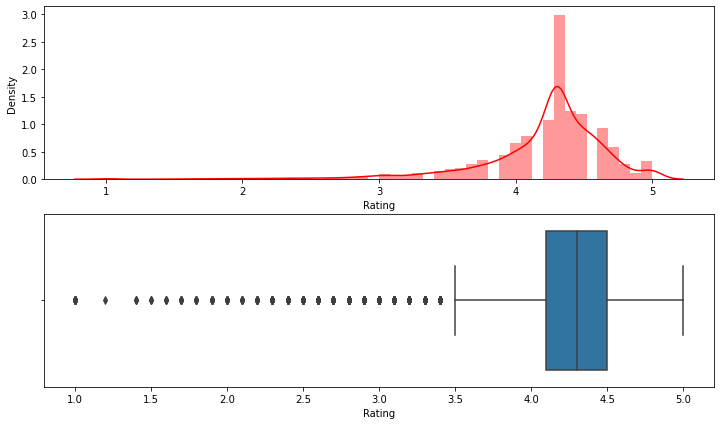

In [ ]:
#let's check outliers again
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(df['Rating'],color='red',ax=ax[0])
sns.boxplot(x='Rating',data=df, ax=ax[1])

Hence.Handling of 'Rating' column is done.

#Let's see the Data after cleaning.................

In [ ]:
#dataset information
def information(df):
    print(f"Dataset Shape: {df.shape}")
    information = pd.DataFrame(df.dtypes,columns=['dtypes']).reset_index()
    information['Name'] = information['index']
    information= information[['Name','dtypes']]
    information['Null'] = df.isnull().sum().values    
    information['Uniques'] = df.nunique().values
    return information
result = information(df).sort_values('Null', ascending= False)
print(result)

Dataset Shape: (10357, 12)
              Name   dtypes  Null  Uniques
2           Rating  float64  1465       39
0              App   object     0     9659
1         Category   object     0       33
3          Reviews  float64     0     6001
4             Size    int64     0      460
5         Installs    int64     0       20
6             Type   object     0        3
7            Price  float64     0        1
8   Content Rating   object     0        6
9           Genres   object     0      119
10     Current Ver   object     0     2832
11     Android Ver   object     0       27


In [ ]:
#check again statistical information of dataset after converting some columns to numeric
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8892.000000,1.035700e+04,1.035700e+04,1.035700e+04,10357.0
mean,4.187877,4.059046e+05,1.815125e+07,1.415776e+07,0.0
std,0.522377,2.696778e+06,2.213900e+07,8.023955e+07,0.0
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,4.000000,3.200000e+01,2.700000e+06,1.000000e+03,0.0
50%,4.300000,1.680000e+03,9.100000e+06,1.000000e+05,0.0
75%,4.500000,4.641600e+04,2.600000e+07,1.000000e+06,0.0
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,0.0


In [ ]:
#data after clening
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4


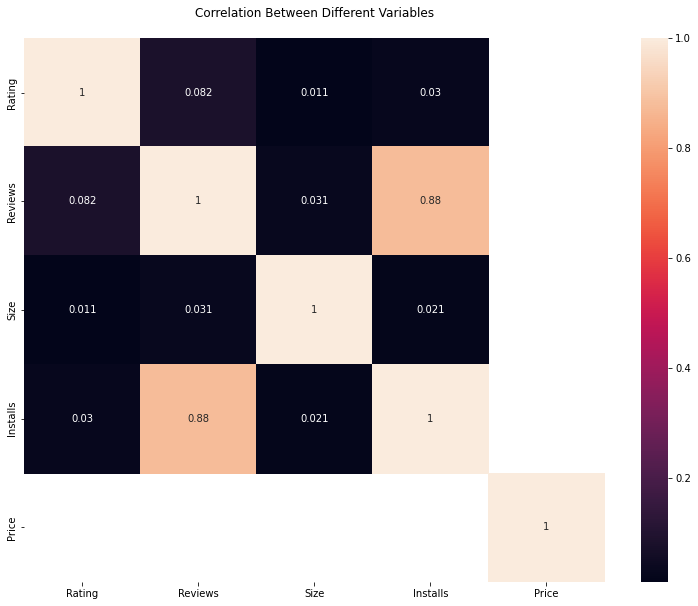

In [ ]:
#let's see the correlation among numerical columns
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

There is a strong positive correlation between the Reviews and Installs column.

 This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.


The Price is slightly negatively correlated with the Rating, Reviews, and Installs. 

This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.

TheRating is slightly positively correlated with theInstalls and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

#**5.EDA----Let's Visualize the data**

In [ ]:
#cleaned datset
cleaned_df=df.copy()
cleaned_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000,5000,Free,0.0,Everyone,Education,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000,100,Free,0.0,Everyone,Education,1.0,4.1
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9500000,1000,Free,0.0,Everyone,Medical,1.0,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies


In [292]:
# saving the dataframe
cleaned_df.to_csv('file1.csv')

In [ ]:
#maximum and minimum number of installs 
df['Installs'].min(),df['Installs'].max()

(0, 1000000000)

##5(b)>>Top 10 Generes in Google Play Store

In [293]:
i=df.groupby(['Genres'])[['Installs']].sum().sort_values(by="Installs",ascending=False).head()
i

,Installs
Genres,
Communication,24152276251
Social,12513867902
Productivity,12463091369
Tools,11442771915
Photography,9721247655


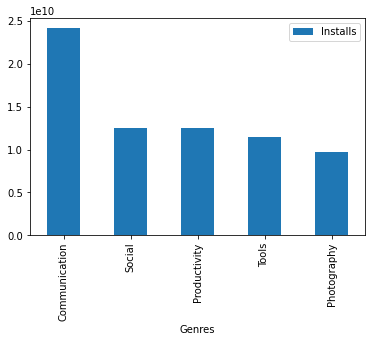

In [295]:
i.plot(kind='bar')

##5(c)>>Counts of Each Category

In [ ]:
category_list_count=df.Category.value_counts()
category_list_count

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

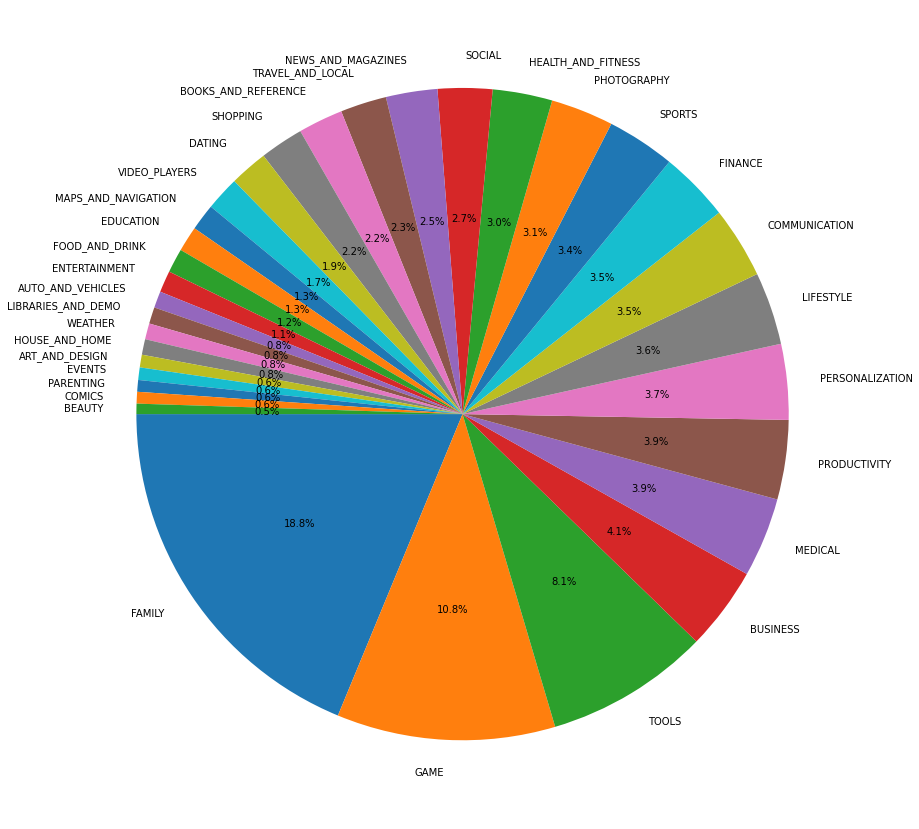

In [ ]:
plt.figure(figsize=(25,15))
g = plt.pie(category_list_count, labels=category_list_count.index,autopct='%1.1f%%', startangle=180)
plt.show()

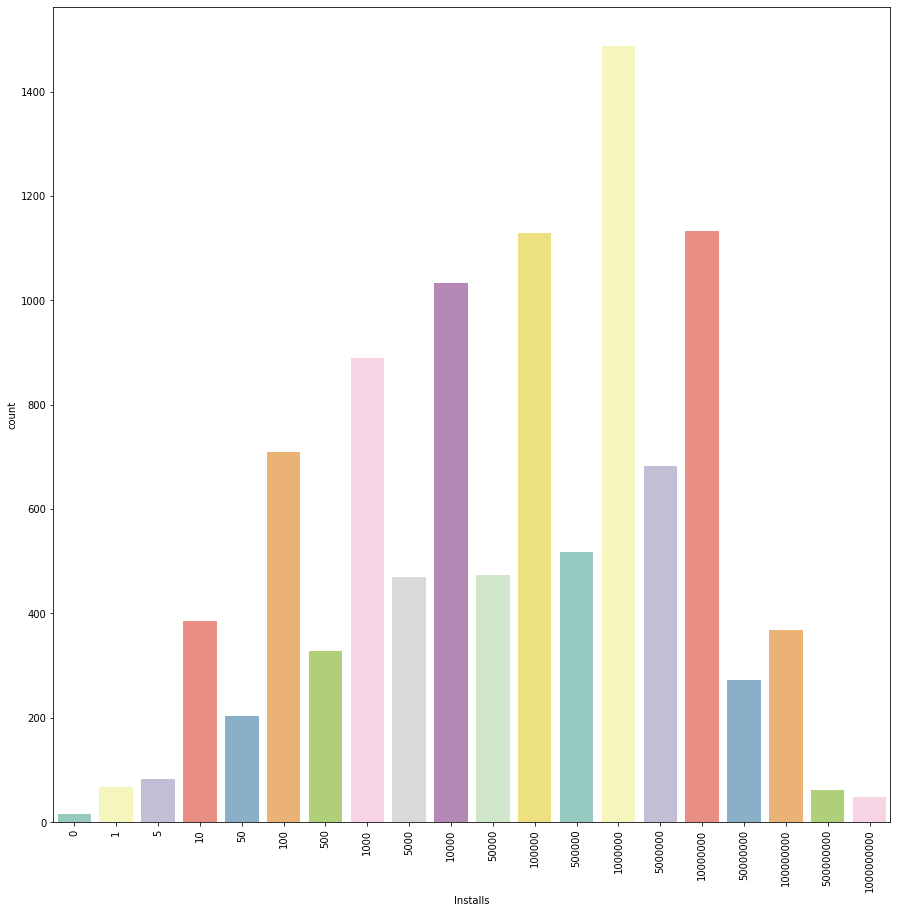

In [ ]:
plt.subplots(figsize=(15,15))
plt.xticks(rotation=90)
ax = sns.countplot(x="Installs", data=df, palette="Set3")

##5(d)>>Apps_count in each Category

In [ ]:
cat_Ins_groupby=df.groupby("Category")["Installs"].count().reset_index().sort_values(by='Installs',ascending=False)
cat_Ins_groupby

,Category,Installs
11,FAMILY,1943
14,GAME,1121
29,TOOLS,843
4,BUSINESS,427
20,MEDICAL,408
25,PRODUCTIVITY,407
23,PERSONALIZATION,388
18,LIFESTYLE,373
6,COMMUNICATION,366
12,FINANCE,360


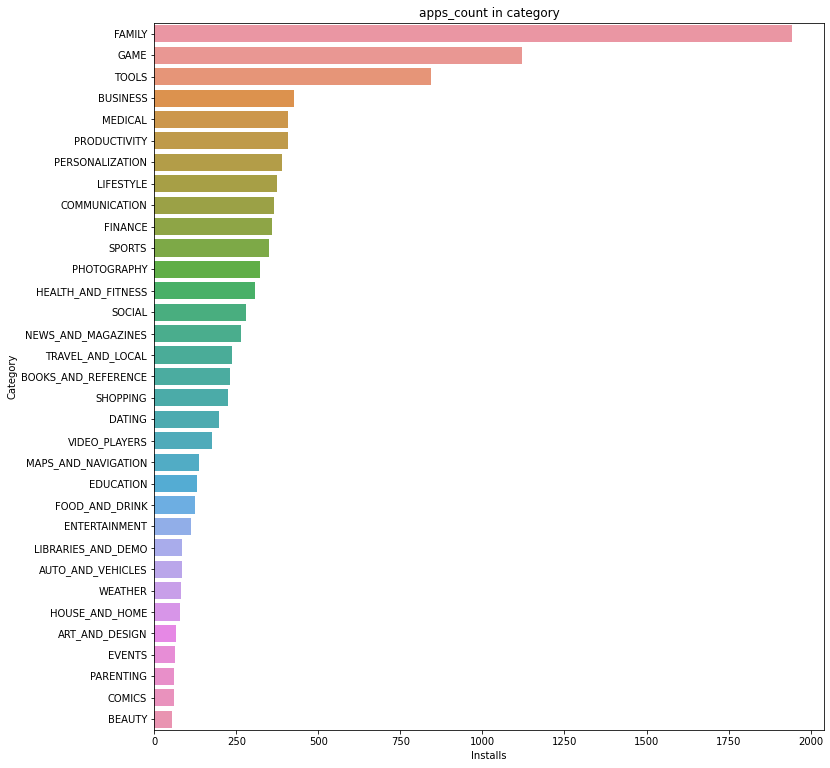

In [ ]:
#which category has the maximum apps
plt.figure( figsize =(12,13) )
sns.barplot(x='Installs',y = 'Category', data =cat_Ins_groupby )
plt.title('apps_count in category')
plt.show()


##5(e)>>Apps counts in each category with their type

In [ ]:
cat_type_app_groupby=df.groupby(['Category','Type'])[['App']].count().reset_index()
cat_type_app_groupby

,Category,Type,App
0,ART_AND_DESIGN,Free,62
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
59,TRAVEL_AND_LOCAL,Paid,12
60,VIDEO_PLAYERS,Free,171
61,VIDEO_PLAYERS,Paid,4
62,WEATHER,Free,74


In [ ]:
app_count =cat_type_app_groupby.pivot('Category', 'Type', 'App').fillna(0).reset_index()
app_count


Type,Category,0,Free,Paid
0,ART_AND_DESIGN,0.0,62.0,3.0
1,AUTO_AND_VEHICLES,0.0,82.0,3.0
2,BEAUTY,0.0,53.0,0.0
3,BOOKS_AND_REFERENCE,0.0,202.0,28.0
4,BUSINESS,0.0,415.0,12.0
5,COMICS,0.0,60.0,0.0
6,COMMUNICATION,0.0,339.0,27.0
7,DATING,0.0,189.0,7.0
8,EDUCATION,0.0,126.0,4.0
9,ENTERTAINMENT,0.0,109.0,2.0


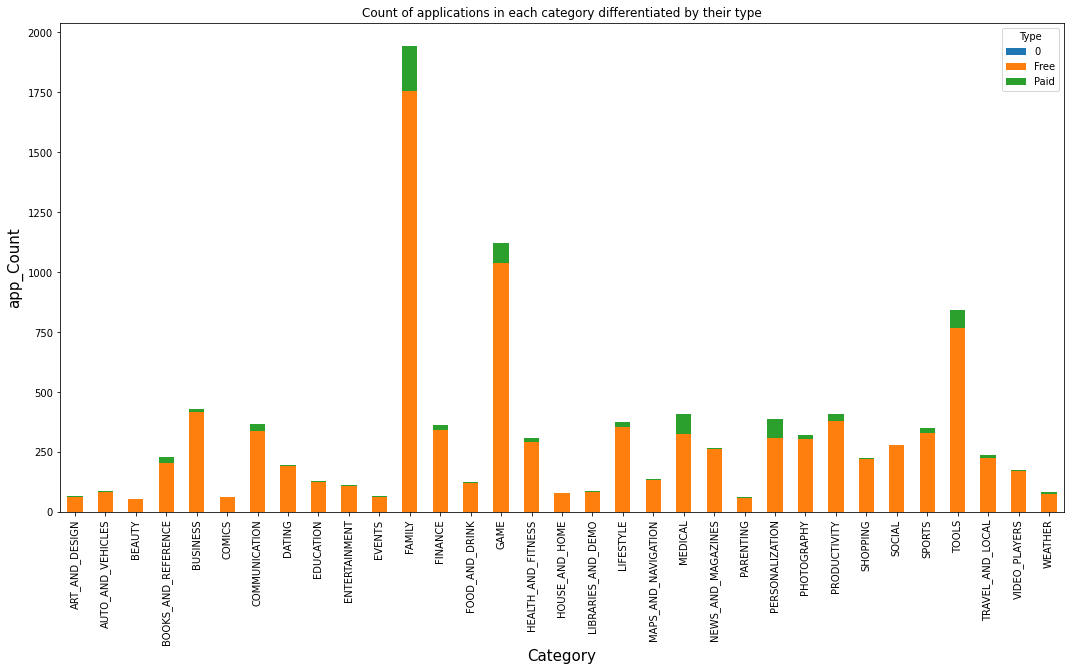

In [ ]:
app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("app_Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

####Category with highest installs

##5(f)>>frequency of Rating

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


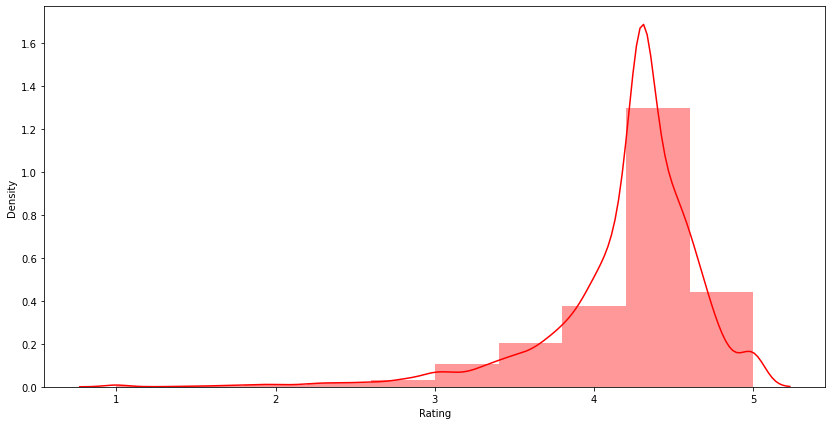

In [ ]:
plt.figure(figsize=(14,7))
sns.distplot(df["Rating"],color="Red",bins=10)
#sns.kdeplot(df["Rating"], color="Red", shade = True)
plt.show()

we can see here that we have mostly apps with the Rating=4.3 

##5(g)>>The number of installs and reviews for the above apps and  apps with the highest reviews to the top.

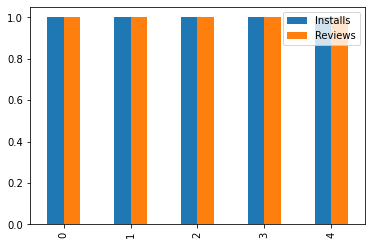

In [ ]:
df.groupby(['App'])[['Installs','Reviews']].count().reset_index()[0:5].sort_values(by="Installs",ascending=False).plot(kind='bar')

##5(h)>>What is the ratio of number of Paid apps and Free apps?

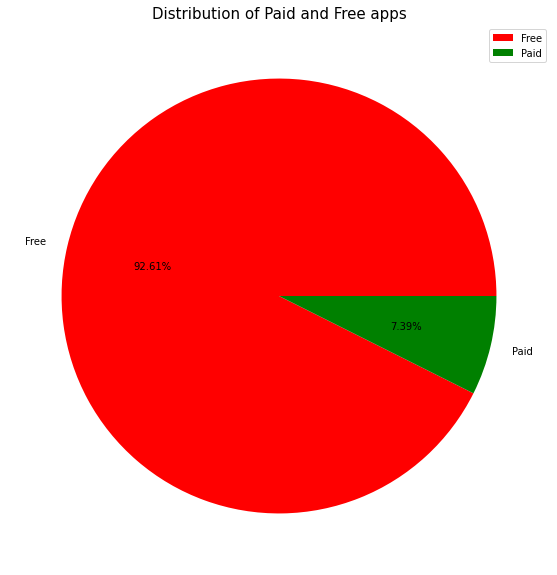

In [ ]:
# create pie chart
plt.figure(figsize=(10,10))
plt.pie(df['Type'].value_counts(), labels = df['Type'].value_counts().index, colors = ["red","green"], autopct='%.2f%%')
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

##5(i)>>Which category of Apps from the Content Rating column are found more on playstore ?

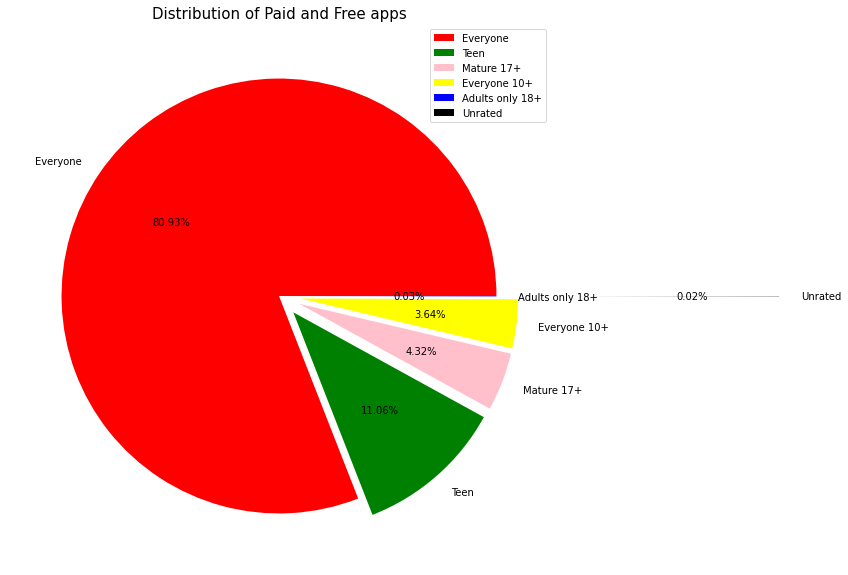

In [ ]:
# create pie chart
plt.figure(figsize=(10,10))
plt.pie(df['Content Rating'].value_counts(), labels = df['Content Rating'].value_counts().index, colors = ["red","green","pink","yellow","blue","black"], autopct='%.2f%%',explode=(0,0.1,0.1,0.1,0.0,1.3))
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()
